Notebook to experiment with scaling the number of spatial nodes.

Motivation: EigenMarkov diffusion worked with 10 nodes, but there was a mismatch upon scaling to 100 spatial locations.

### INIT

In [1]:
import sys

sys.path.append("../src/")

# Models
def get_ca_init_loc():
    # VDCC
    vdcc_loc = 2.35  # um

    return vdcc_loc


def get_ca_init_idx(n_space_pts):
    vdcc_loc = get_ca_init_loc()

    z = 4  # um
    dx = z / n_space_pts

    return int(vdcc_loc / dx)
import models.FiniteDiffRxnDiffusion as fdrd
import models.SpectralRxnDiffusion as srd
from utils.RunMultiruns import *
from utils.PlotMultiruns import PlotMultiRuns

In [2]:
# PLOTTING
binomial_sampling = False  # use binomial sampling for eme markov simulation
print_eigenvalues_and_vectors = False
print_eigenmode_init_conditions = False
print_eigenmode_transition_probability = False
print_eigenmodes_to_spatial_nodes = False
plot_eigenmodes = False
plot_eigenvectors = False
plot_eigenmode_init_conditions = False
plot_eigenmode_markov_simulation = False

### Parameters

In [3]:
# PARAMETERS
n_particles = 50  # number of molecules
n_space_pts = 101  # number of grid points along 1D line
n_time_pts = 100  # number of time points
ca_init_idx = get_ca_init_idx(n_space_pts)  # impulse site
n_eigenmodes = 101  # NOTE: only used in SpectralRxnDiffusion
n_runs = 20  # number of runs for multirun simulations (stochastic)

# Plotting Finite Difference

Stability condition satisfied: 1 <= 3.6363636363636362
Initializing solution array...
Beginning simulation...
Time step:  0
Time step:  10
Time step:  20
Time step:  30
Time step:  40
Time step:  50
Time step:  60
Time step:  70
Time step:  80
Time step:  90
Simulation complete!
Plotting...


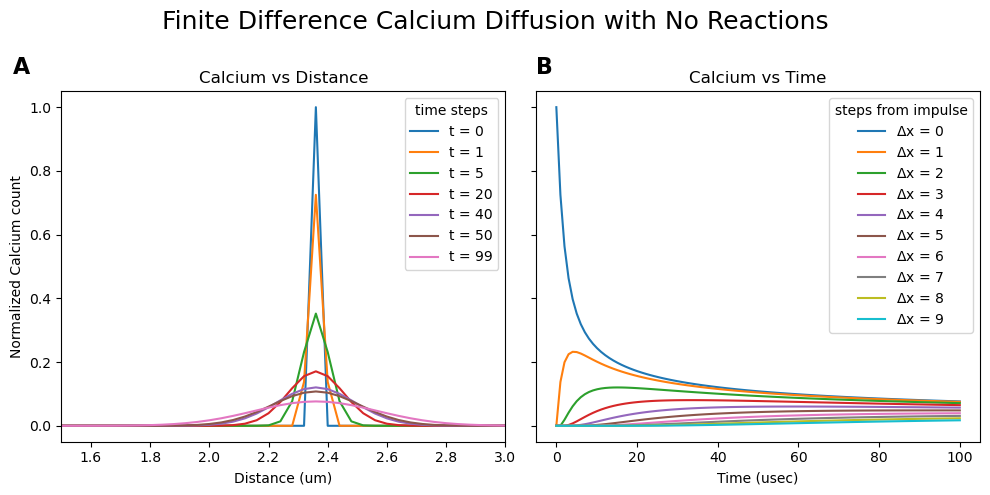

In [4]:
fd = fdrd.FiniteDiffRxnDiffusion(
    n_spatial_locs=n_space_pts, n_time_pts=n_time_pts, impulse_idx=ca_init_idx
)

fd.simulate_diffusion()
fd.plot_diffusion([0, 1, 5, 20, 40, 50, 99])

# Plotting Spectral Solution

In [5]:
# # SPECTRAL
# # DETERMINISTIC AND MODAL
# # NOTE: SRD has internal number of particles == 5275

# sd = srd.SpectralRxnDiffusion(
#     n_spatial_locs=n_space_pts,
#     n_time_pts=n_time_pts,
#     impulse_idx=ca_init_idx,
#     n_eigenmodes=n_eigenmodes,
# )

# sd.simulate_diffusion()
# sd.plot_diffusion([0, 1, 5, 20, 40, 50, 99])

In [6]:
from utils.RunMultiruns import EMERunMultiruns

eme = EMERunMultiruns(
    n_runs=n_runs,
    n_particles=n_particles,
    n_spatial_locs=n_space_pts,
    n_time_pts=n_time_pts,
    particle_start_loc=ca_init_idx
)

EME_RUN = eme.run_multi(make_dir=True)

eme_prev = EMERunMultiruns(
    n_runs=n_runs,
    n_particles=n_particles,
    n_spatial_locs=n_space_pts,
    n_time_pts=n_time_pts,
    particle_start_loc=58,
)

EME_RUN_PREV = eme_prev.run_multi(make_dir=True)

rw = RWRunMultiruns(
    n_runs=n_runs,
    n_particles=n_particles,
    n_spatial_locs=n_space_pts,
    n_time_pts=n_time_pts,
    particle_start_loc=ca_init_idx
)

RW_RUN = rw.run_multi(make_dir=True)

print("start index", ca_init_idx)

Made new directory: ../data/eme-validation/markov-eme/20240412_140527/
RUNNING SIMULATION 0
n_per_positive_mode [ 6.76207154  0.          0.          6.33239656  1.19782948  6.99432128
  0.          5.52038599  5.71784113  2.36068716  7.02236504  1.51989609
  6.18246519  4.93634778  0.          6.84538403  0.32816064  6.66404133
 -0.          0.          0.          0.          5.31091567  0.
  0.          0.          4.01073297  0.          5.16481779  6.91379748
  0.          0.          0.65560704  6.55150676  4.27599238  4.18857855
  6.5906154   0.          0.          3.26232523  0.          0.
  7.03257202  0.          0.          0.          0.          0.9816265
  6.42471277  0.          0.          6.69834085  0.          0.
  6.23395417 -0.          1.41287363  0.         -0.          0.
  5.65338484 -0.          0.          5.23850025  0.          0.
  0.76447386  6.51081348  4.36237195  0.          0.          0.
  4.77803388  0.          5.78091442  2.25732224  0.         

# Plotting Eigenmarkov

n_runs: 20
n_particles: 48.70415887371156
Preparing to plot simulation data...
Plotting simulation data...
Beautifying plot...
Preparing to plot simulation data...
Plotting simulation data...
Beautifying plot...


<Axes: title={'center': 'Normalized number of particles in each position over time'}, xlabel='distance (um)', ylabel='normalized count'>

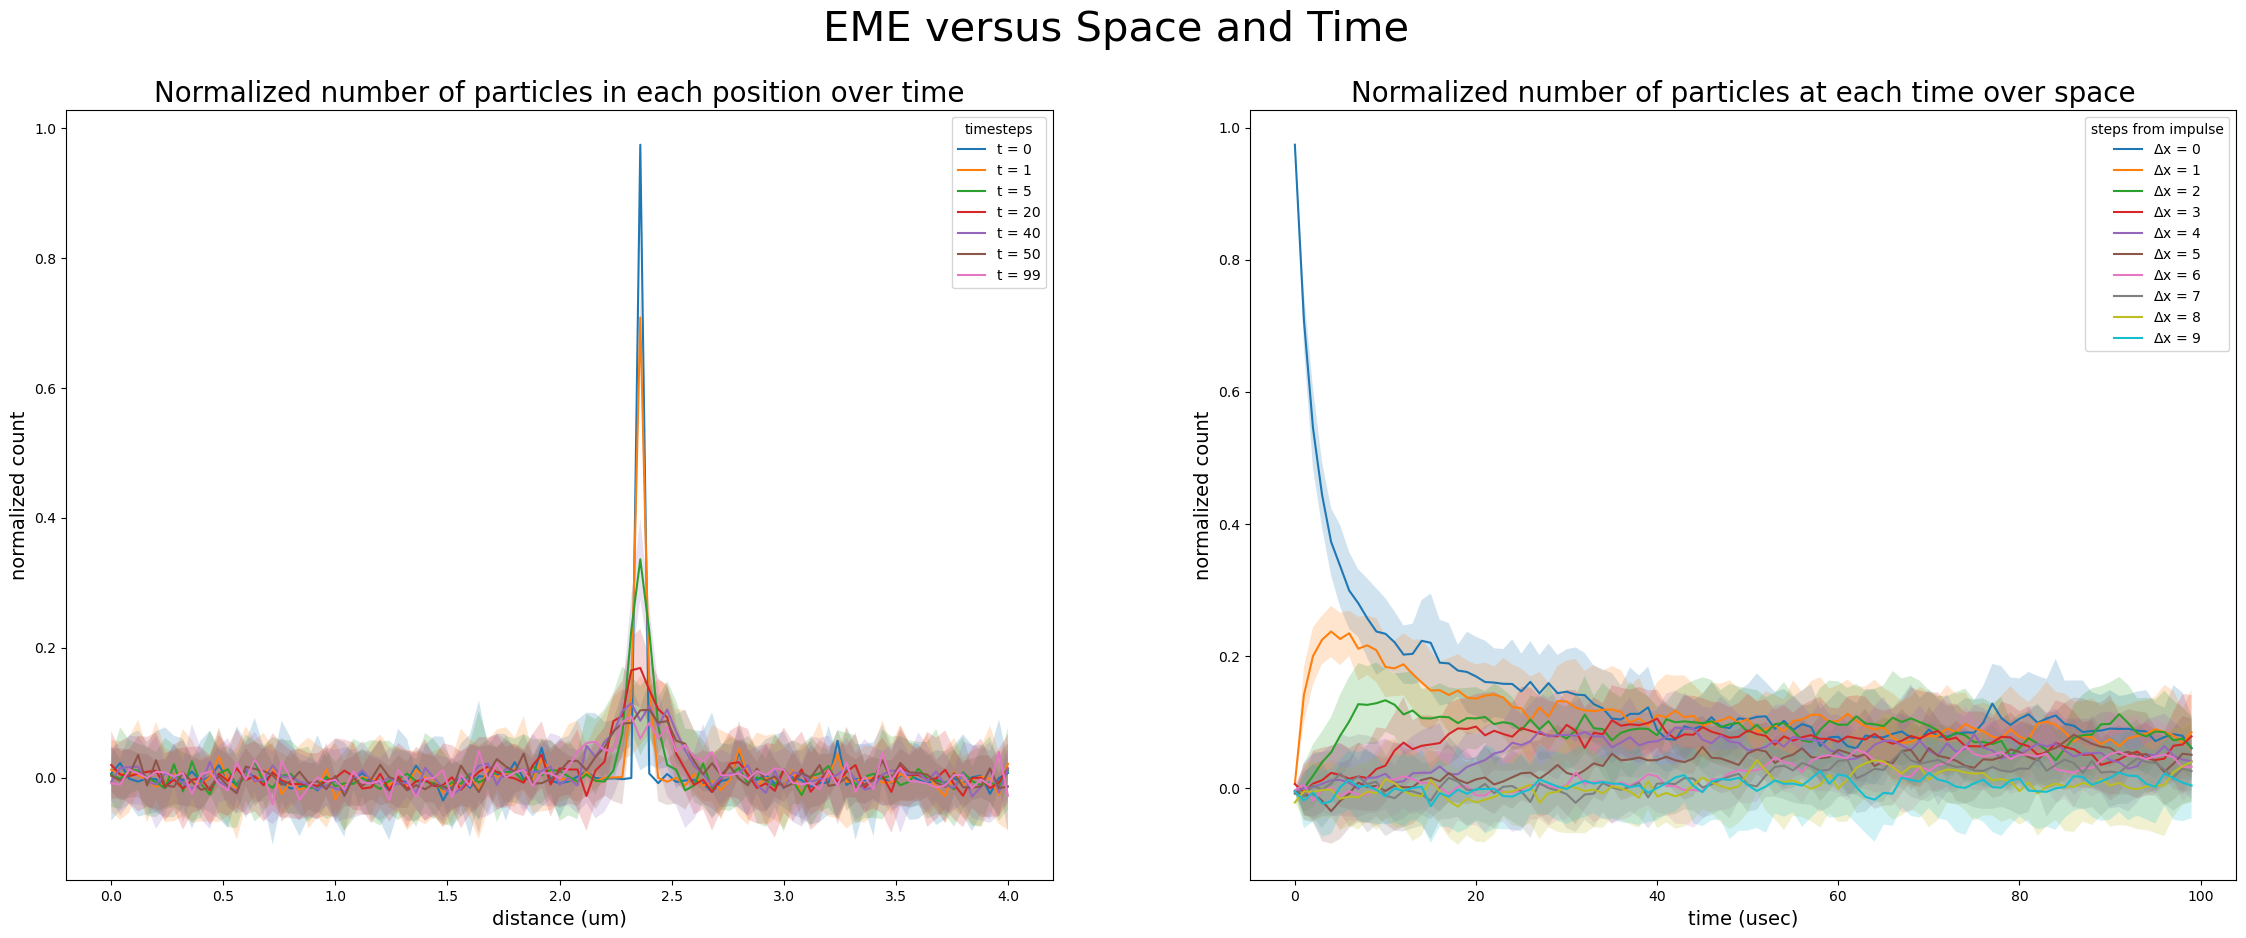

In [7]:
import utils.PlotMultiruns as pm

eme_plotter = pm.PlotMultiRuns(
    dir=f"../data/eme-validation/markov-eme/{EME_RUN}/",
    file_id="eme",
    eme_particles=n_particles
)

# plotter.plot_multiruns()
# TODO: debug multirun plot for EME -- giving impulse at boundary
# plotter.plot_multiruns_time([0, 99, 99])

import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(28, 10)) 
plt.suptitle("EME versus Space and Time", fontsize=30)
eme_plotter.plot_multiruns_space(axis=ax2)
eme_plotter.plot_multiruns_time(axis=ax1,time=[0, 1, 5, 20, 40, 50, 99])

n_runs: 20
n_particles: 48.704158873711776
Preparing to plot simulation data...
Plotting simulation data...
Beautifying plot...
Preparing to plot simulation data...
Plotting simulation data...
Beautifying plot...
Preparing to plot simulation data...
Plotting simulation data...
Beautifying plot...
Preparing to plot simulation data...
Plotting simulation data...
Beautifying plot...


<Axes: title={'center': 'Normalized number of particles at each time over space'}, xlabel='time (usec)', ylabel='normalized count'>

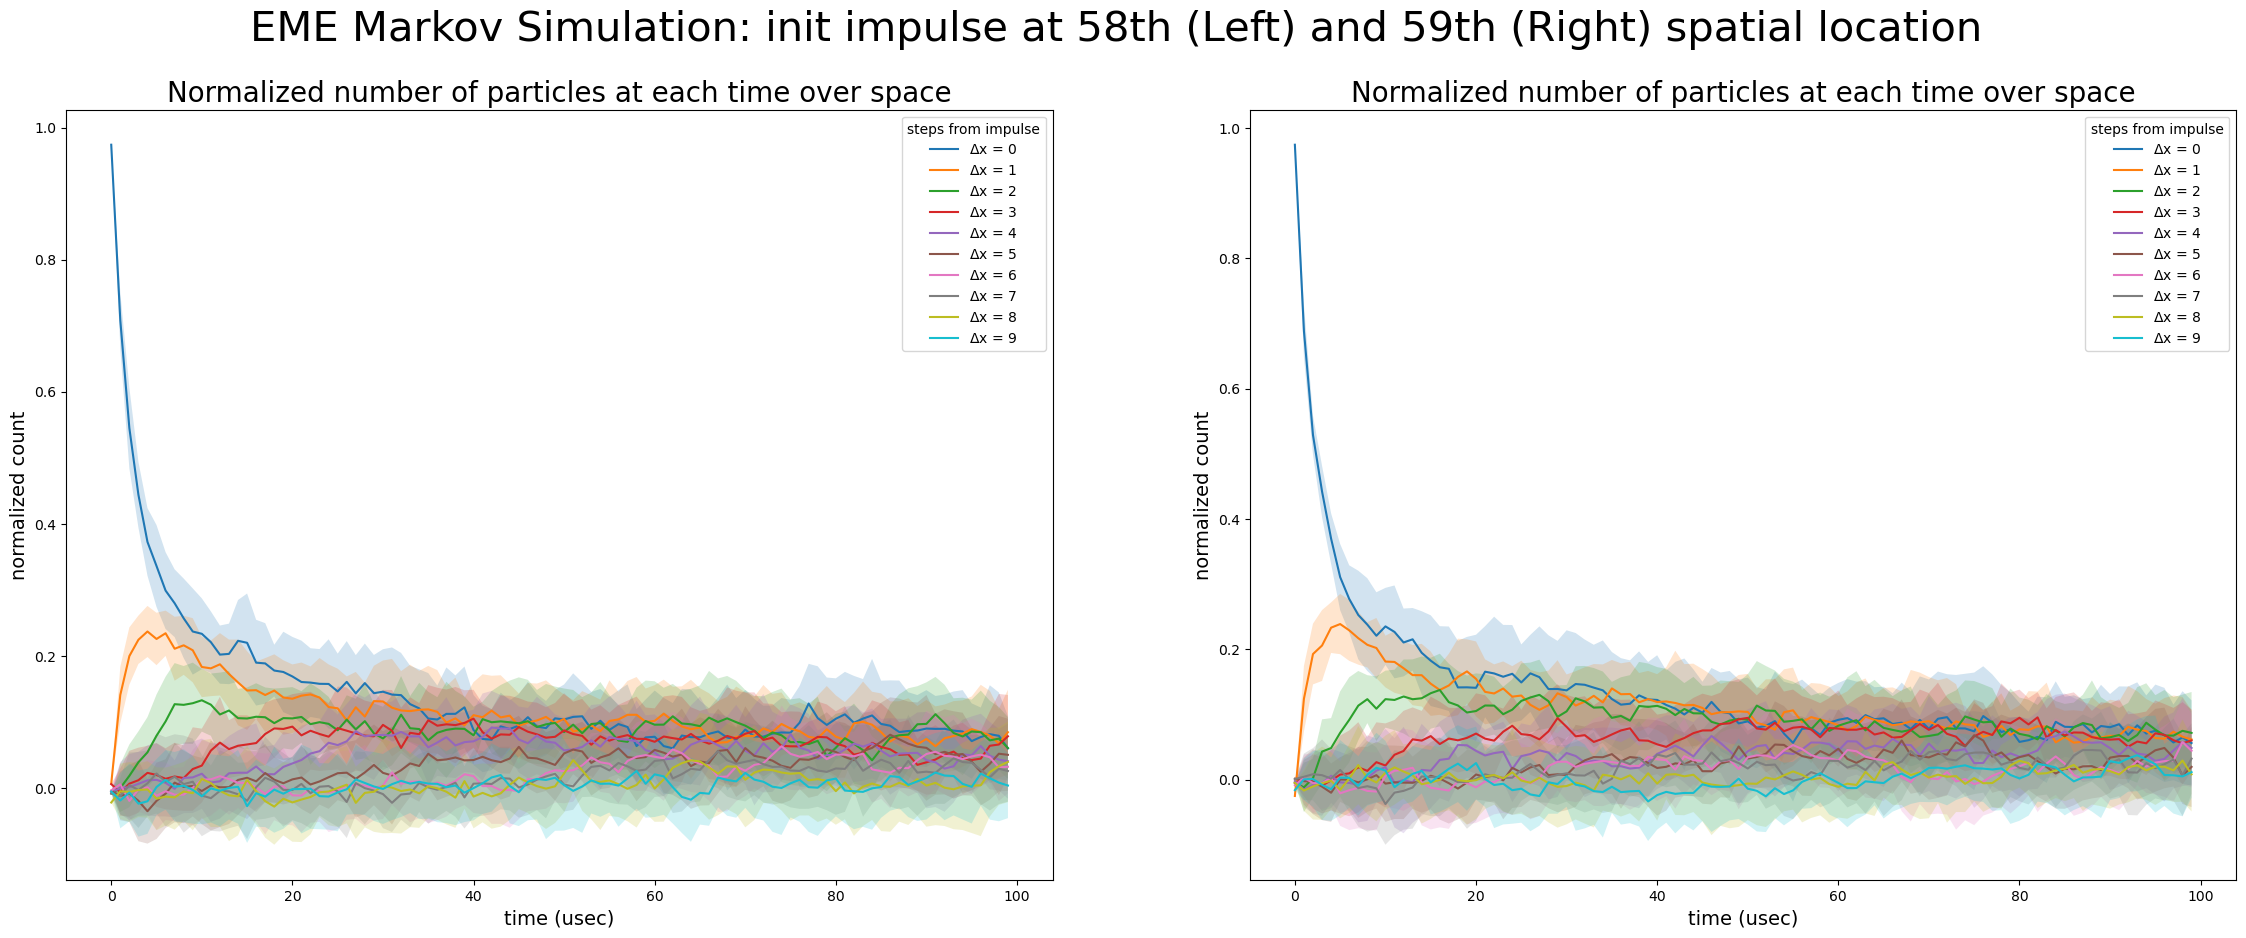

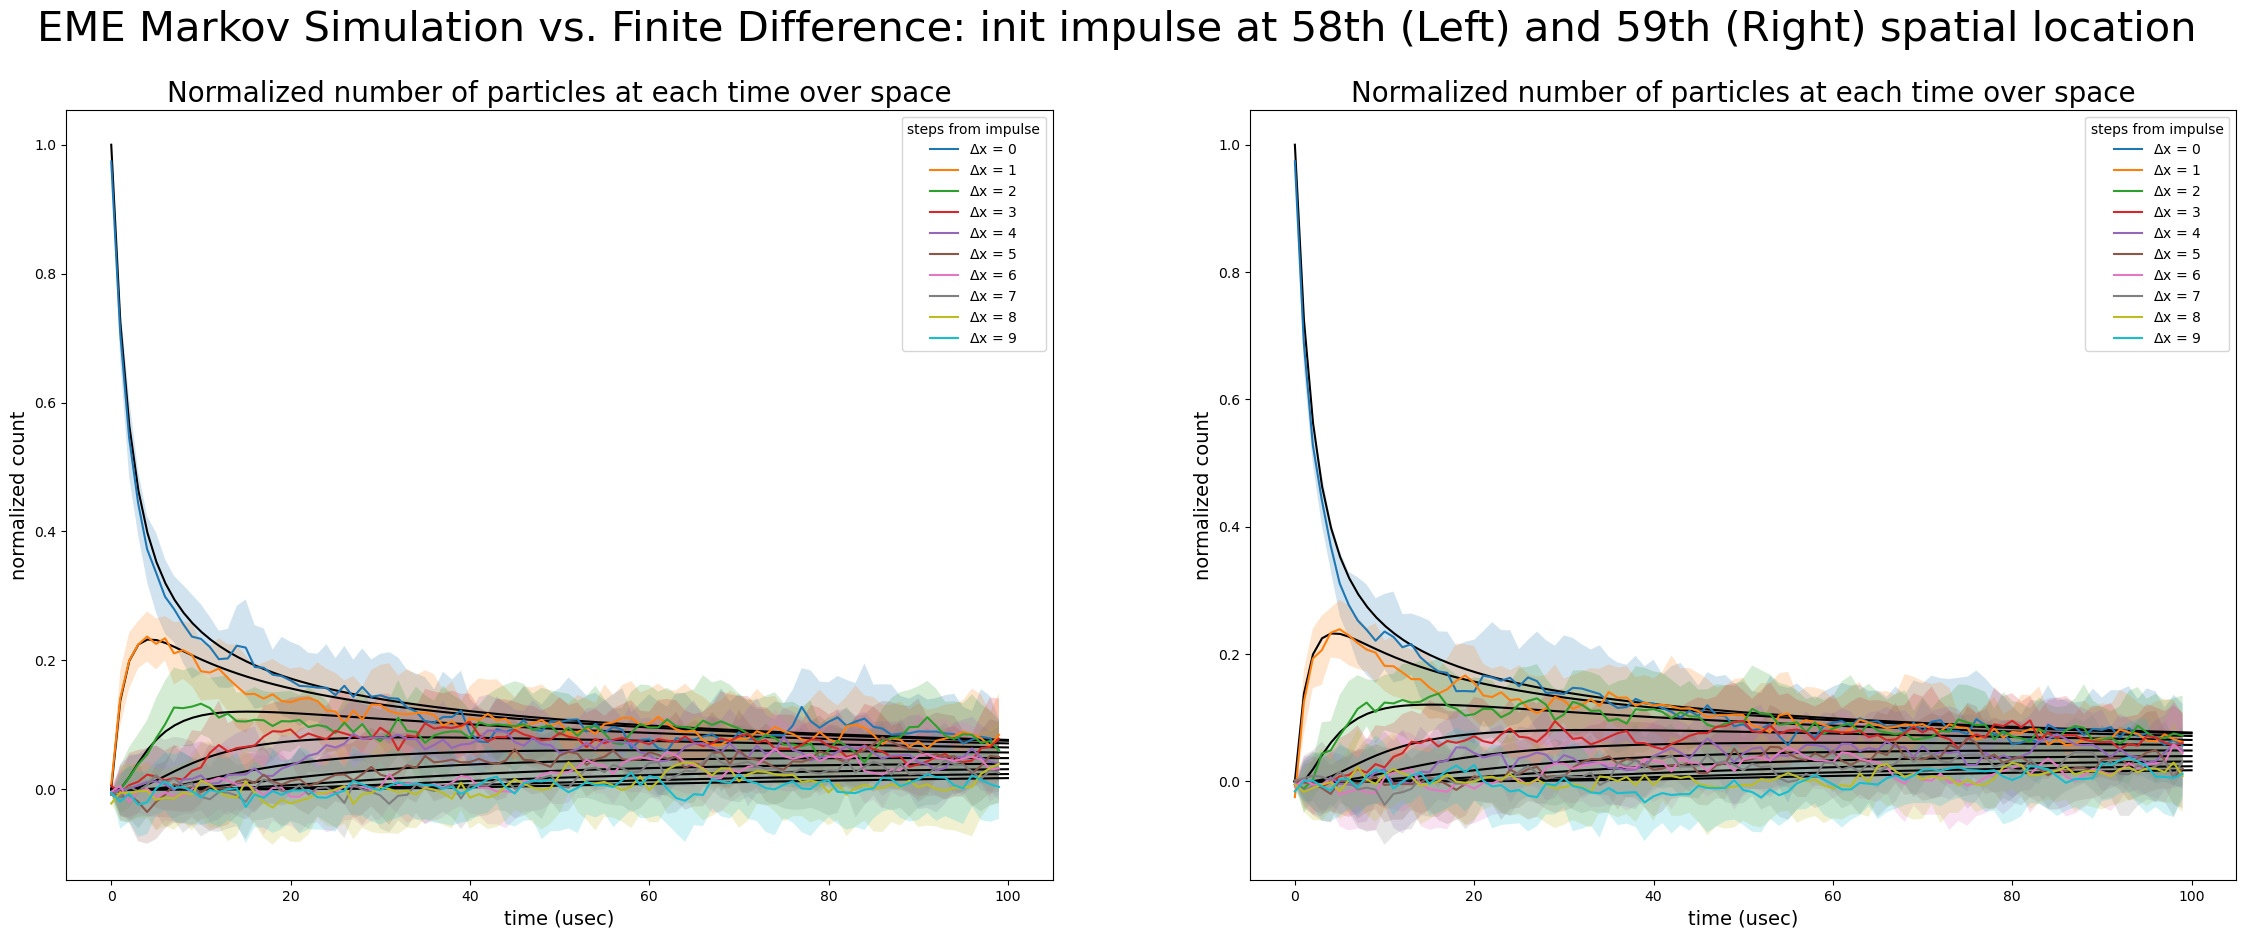

In [8]:
import utils.PlotMultiruns as pm

eme_prev_plotter = pm.PlotMultiRuns(
    dir=f"../data/eme-validation/markov-eme/{EME_RUN_PREV}/",
    file_id="eme",
    eme_particles=50,
    start_loc=58
)


import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(28, 10)) 
plt.suptitle("EME Markov Simulation: init impulse at 58th (Left) and 59th (Right) spatial location", fontsize=30)
eme_prev_plotter.plot_multiruns_space(axis=ax2)
eme_plotter.plot_multiruns_space(axis=ax1)

#Plotting both vs. finite difference
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(28, 10)) 
plt.suptitle("EME Markov Simulation vs. Finite Difference: init impulse at 58th (Left) and 59th (Right) spatial location", fontsize=30)
eme_prev_plotter.compare_overlap_space(compare=fd, axis=ax2)
eme_plotter.compare_overlap_space(compare=fd, axis=ax1)

# Plotting Random Walk

n_runs: 20
start_loc: 59
n_particles: 1.0
Preparing to plot simulation data...
Plotting simulation data...
Beautifying plot...
Preparing to plot simulation data...
Plotting simulation data...
Beautifying plot...


<Axes: title={'center': 'Normalized number of particles in each position over time'}, xlabel='distance (um)', ylabel='normalized count'>

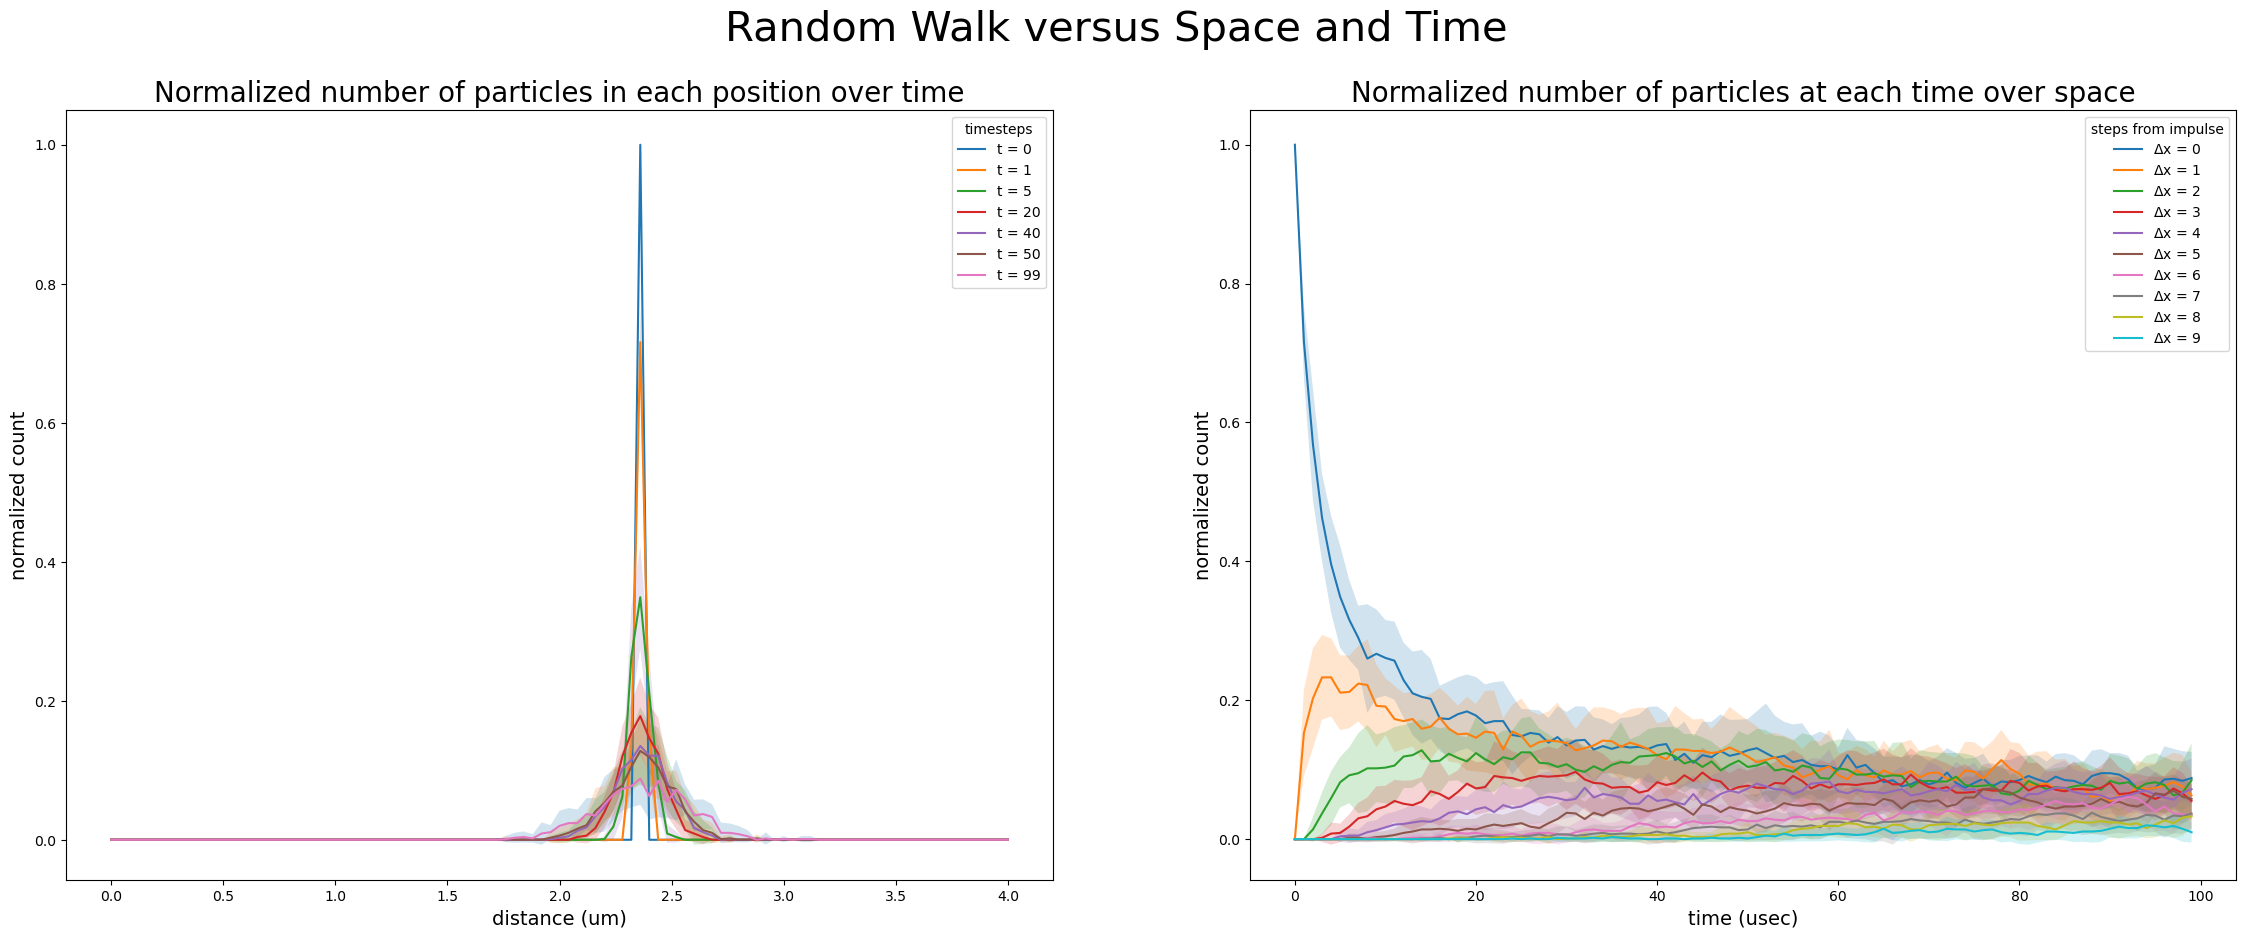

In [9]:
import utils.PlotMultiruns as pm

rw_plotter = pm.PlotMultiRuns(
    dir=f"../data/eme-validation/random-walk/{RW_RUN}/",
    file_id="rw",
    eme_particles=n_particles
)

# plotter.plot_multiruns()
# TODO: debug multirun plot for EME -- giving impulse at boundary
# plotter.plot_multiruns_time([0, 99, 99])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(28, 10)) 
plt.suptitle("Random Walk versus Space and Time", fontsize=30)
rw_plotter.plot_multiruns_space(axis=ax2)
rw_plotter.plot_multiruns_time(axis=ax1,time=[0, 1, 5, 20, 40, 50, 99])

Preparing to plot simulation data...
Plotting simulation data...
Beautifying plot...
Preparing to plot simulation data...
Plotting simulation data...
Beautifying plot...


((0.0, 1.0), (0.0, 1.0))

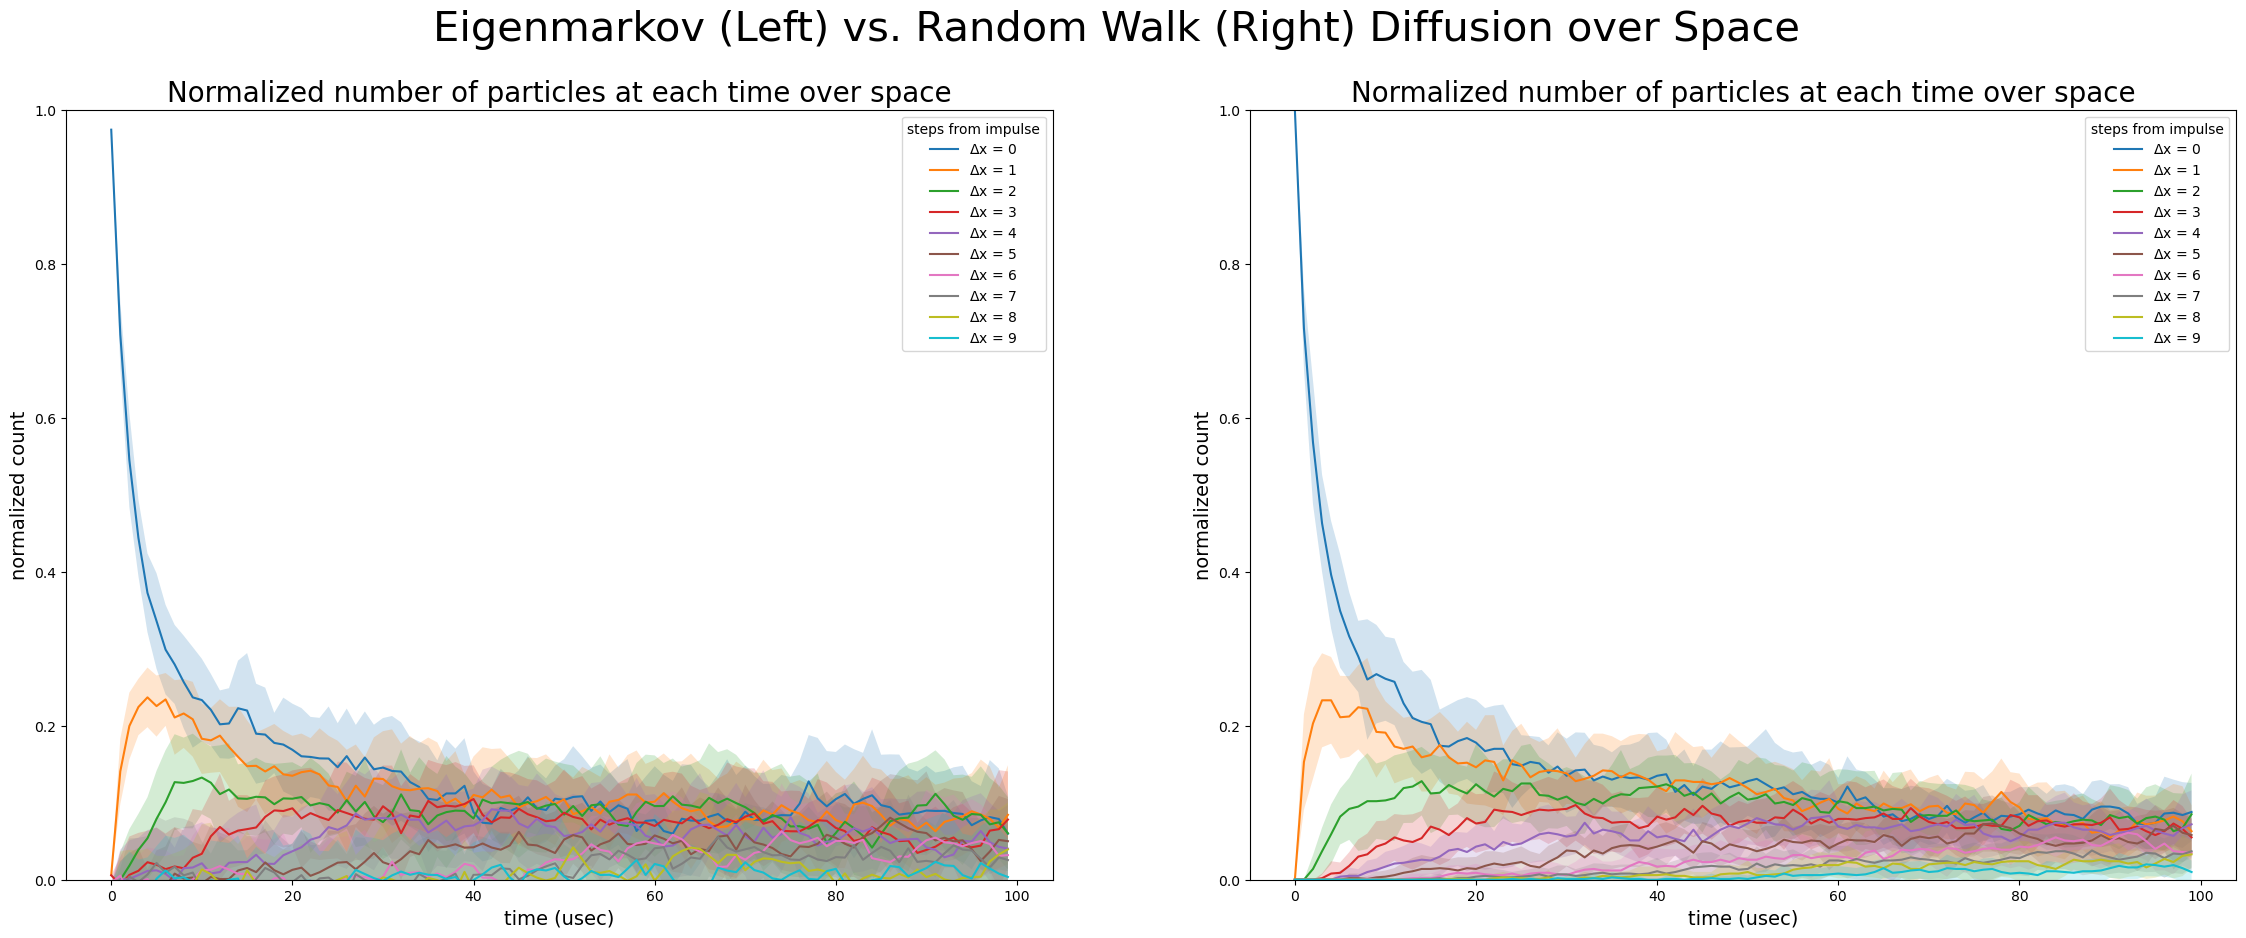

In [10]:
# Random Walk and EME side by side

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(28, 10))
plt.suptitle("Eigenmarkov (Left) vs. Random Walk (Right) Diffusion over Space", fontsize=30) 
rw_plotter.plot_multiruns_space(axis=ax2)
eme_plotter.plot_multiruns_space(axis=ax1)

ax1.set_ylim([0, 1]), ax2.set_ylim([0, 1])

Preparing to plot simulation data...
Plotting simulation data...
Beautifying plot...
Preparing to plot simulation data...
Plotting simulation data...
Beautifying plot...


<Axes: title={'center': 'Normalized number of particles in each position over time'}, xlabel='distance (um)', ylabel='normalized count'>

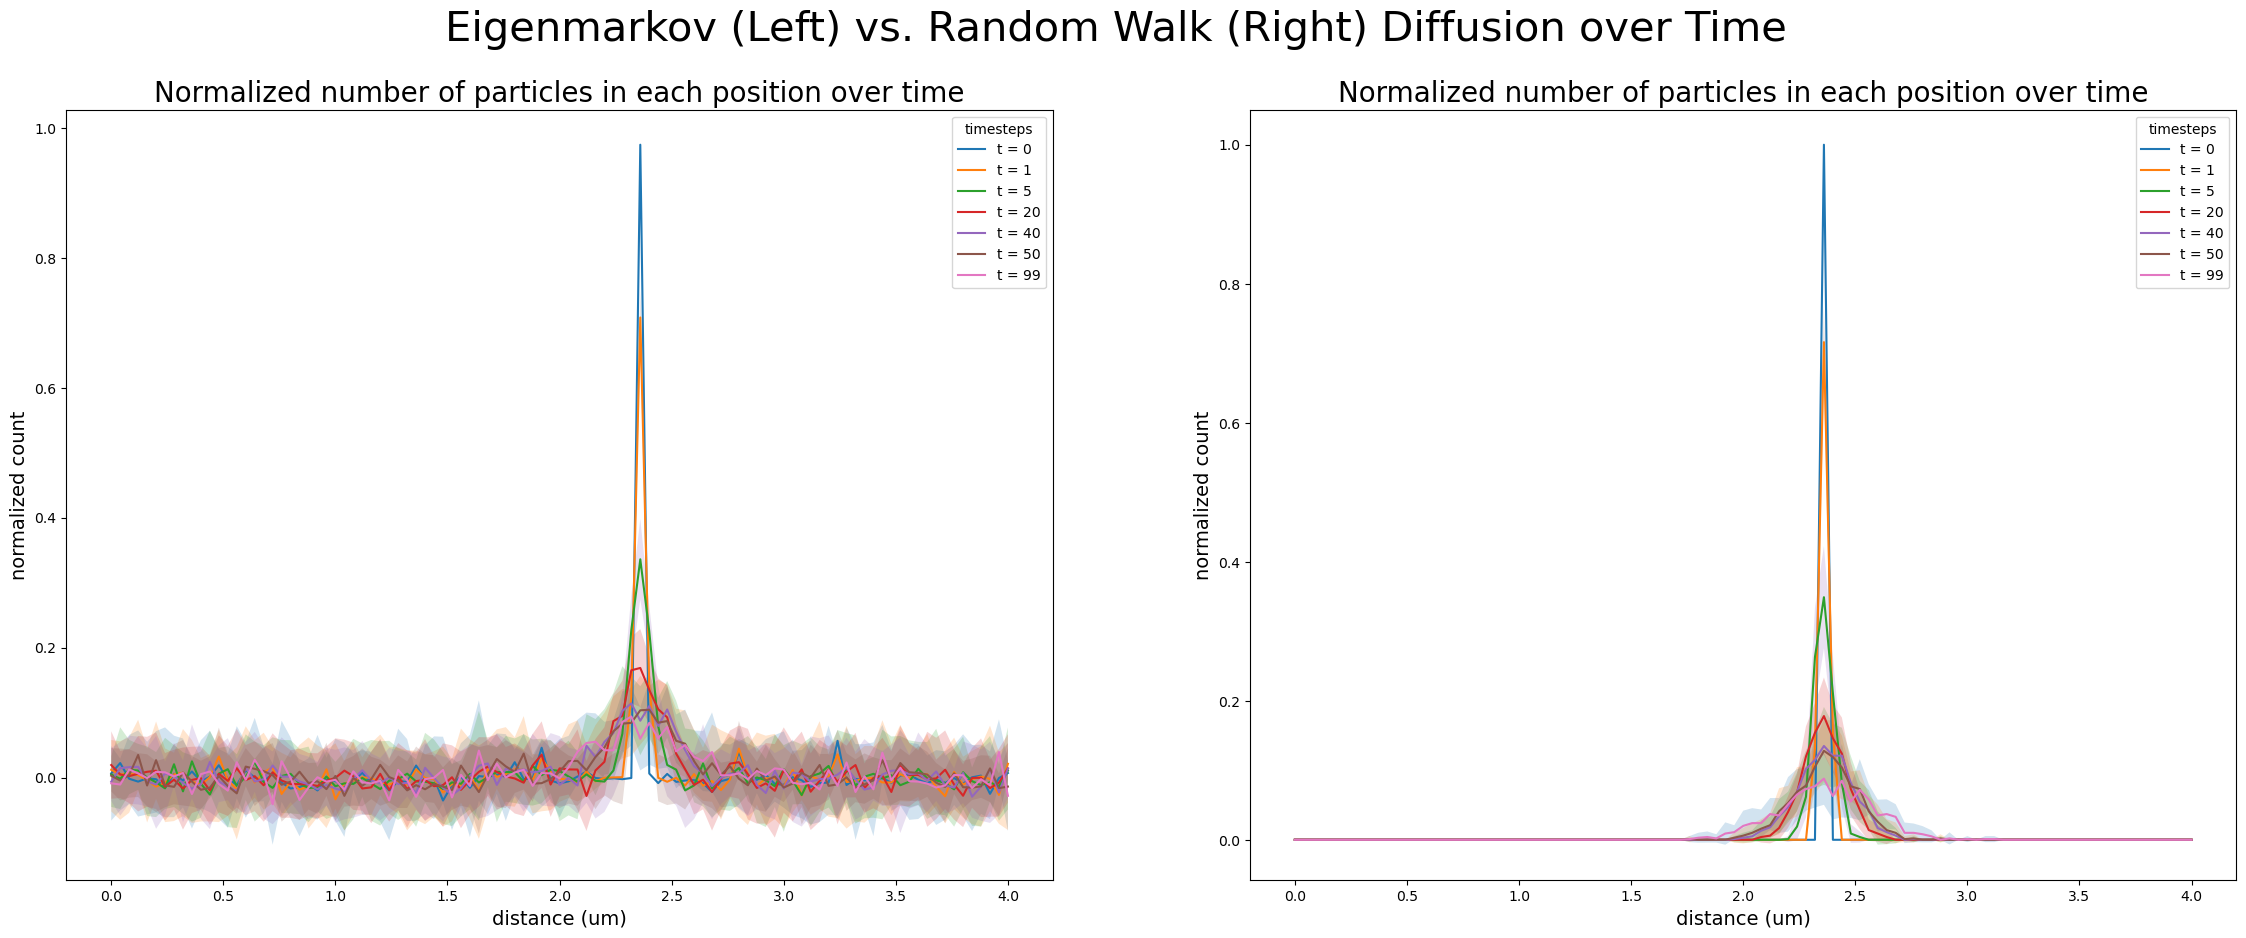

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(28, 10))
plt.suptitle("Eigenmarkov (Left) vs. Random Walk (Right) Diffusion over Time", fontsize=30) 
rw_plotter.plot_multiruns_time(axis=ax2,time=[0, 1, 5, 20, 40, 50, 99])
eme_plotter.plot_multiruns_time(axis=ax1,time=[0, 1, 5, 20, 40, 50, 99])

# EME and Finite Difference Agree
### Will address the discrepancy in time in a later cell

Preparing to plot simulation data...
Plotting simulation data...
Beautifying plot...
Preparing to plot simulation data...
Plotting simulation data...
Beautifying plot...


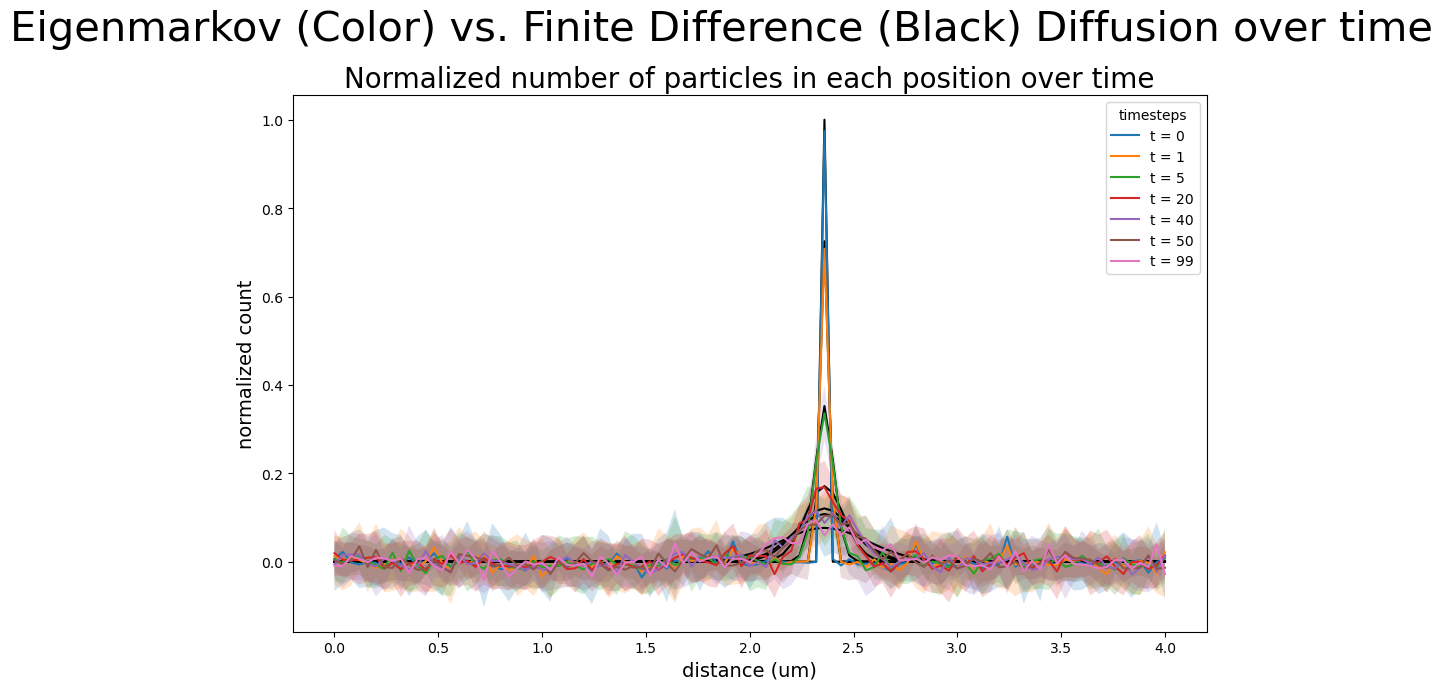

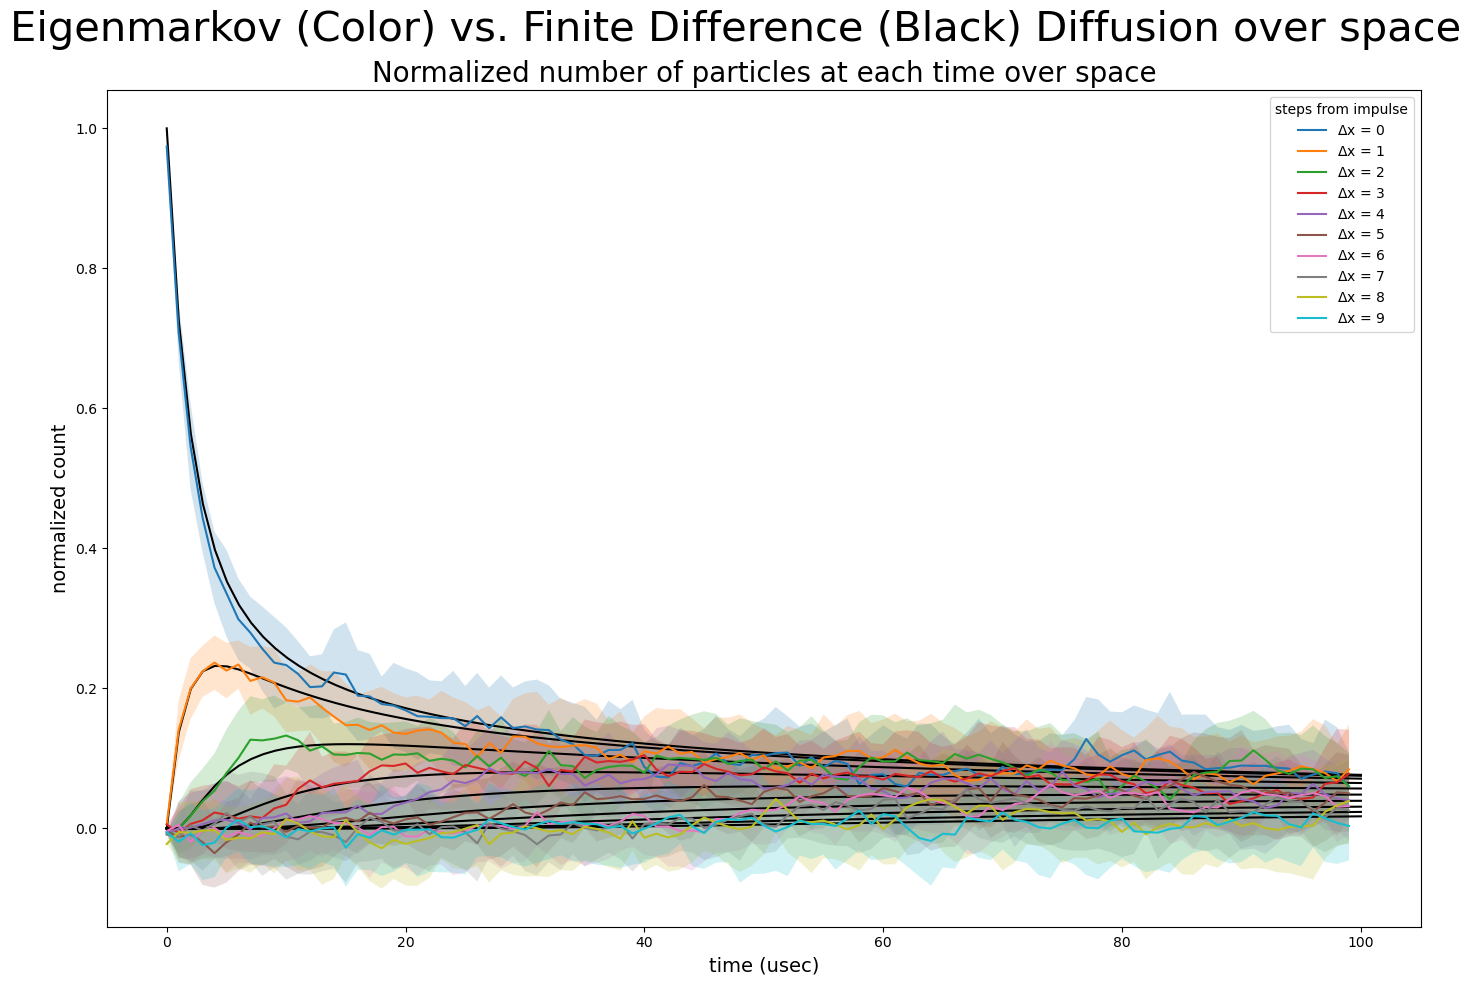

In [12]:
# FINITE DIFFERENCE
# DETERMINISTIC AND NODAL
# NOTE: FD has internal number of particles == 5275


fig, axs = plt.subplots(1, 1, figsize=(10, 7), sharey=True)
plt.suptitle("Eigenmarkov (Color) vs. Finite Difference (Black) Diffusion over time", fontsize=30) 
eme_plotter.compare_overlap_time(time=[0, 1, 5, 20, 40, 50, 99], compare=fd, axis = axs)
plt.tight_layout()

fig, axs = plt.subplots(1, 1, figsize=(14, 10), sharey=True)
plt.suptitle("Eigenmarkov (Color) vs. Finite Difference (Black) Diffusion over space", fontsize=30) 
eme_plotter.compare_overlap_space(compare=fd, axis = axs)
plt.tight_layout()

# EME and Spectral Agree
### Will address the discrepancy in time in a later cell

NameError: name 'sd' is not defined

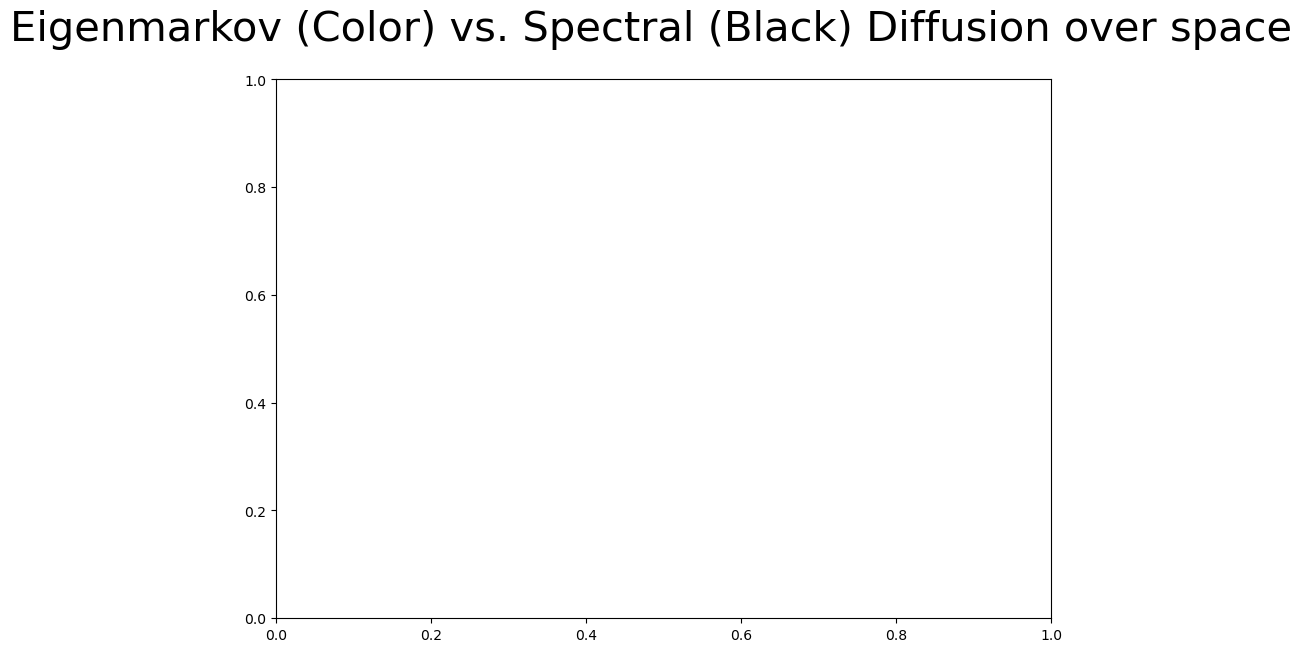

In [13]:

fig, axs = plt.subplots(1, 1, figsize=(10, 7), sharey=True)
plt.suptitle("Eigenmarkov (Color) vs. Spectral (Black) Diffusion over space", fontsize=30) 
eme_plotter.compare_overlap_time(time=[0, 1, 5, 20, 40, 50, 99], compare=sd, axis = axs)
plt.tight_layout()

fig, axs = plt.subplots(1, 1, figsize=(14, 10), sharey=True)
plt.suptitle("Eigenmarkov (Color) vs. Spectral (Black) Diffusion over time", fontsize=30) 
eme_plotter.compare_overlap_space(compare=sd, axis = axs)
plt.tight_layout()

# EME BUG FIXING

## Number of particles in each position overtime is correct but appears to be reflected across the 2.0 um tickmark on plot

In [ ]:
# FINITE DIFFERENCE
# DETERMINISTIC AND NODAL
# NOTE: FD has internal number of particles == 5275
fd = fdrd.FiniteDiffRxnDiffusion(
    n_spatial_locs=n_space_pts, n_time_pts=n_time_pts, impulse_idx=ca_init_idx
)


fd.simulate_diffusion()
# fd.plot_diffusion([0, 1, 5, 20, 40, 50, 99])
fig, axs = plt.subplots(1, 1, figsize=(10, 7), sharey=True)
plt.suptitle("HACKY Eigenmarkov (Color) vs. Finite Difference (Black) Diffusion over space", fontsize=30) 
eme_plotter.eme_bug_compare_overlap_time(time=[0, 1, 5, 20, 40, 50, 99], compare=fd, axis = axs)
plt.tight_layout()

fig, axs = plt.subplots(1, 1, figsize=(14, 10), sharey=True)
plt.suptitle("HACKY Eigenmarkov (Color) vs. Finite Difference (Black) Diffusion over time", fontsize=30) 
eme_plotter.eme_bug_compare_overlap_space(compare=fd, axis = axs)
plt.tight_layout()

## Last 10 Space Points after the Impulse give us the behavior we are looking for to compare EME with RW
### If you exclude the last 10 space points after the impulse, you see nonsense

### Plot of EME vs. RW, where we plot EME with _JUST_ the first 10 space points after the impulse

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(28, 10))
plt.suptitle("HACKY Eigenmarkov (Left) vs. Random Walk (Right) Diffusion over time", fontsize=30) 
rw_plotter.plot_multiruns_space(axis=ax2, steps_from_impulse=41)

eme_plotter.eme_bug_plot_multiruns_space(axis=ax1)

### Plot of EME vs. RW, where we plot EME with only the first 10 space points after the impulse _EXCLUDED_

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(28, 10))
plt.suptitle("NONSENSE Eigenmarkov (Left) vs. Random Walk (Right) Diffusion over time", fontsize=30) 
rw_plotter.plot_multiruns_space(axis=ax2, steps_from_impulse=41)

# setting nonsense to "TRUE" excludes
eme_plotter.eme_bug_plot_multiruns_space(axis=ax1, nonsense=True)

### Plot of EME vs. RW, but
1. We _ONLY_ plot the last 10 space points after the impulse for EME
2. We _ONLY_ plot the first 10 space points after the impulse for RW

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(28, 10))
plt.suptitle("HACKY ALIGNED Eigenmarkov (Left) vs. Random Walk (Right) Diffusion over time", fontsize=30) 
rw_plotter.plot_multiruns_space(axis=ax2, steps_from_impulse=10)

eme_plotter.eme_bug_plot_multiruns_space(axis=ax1)